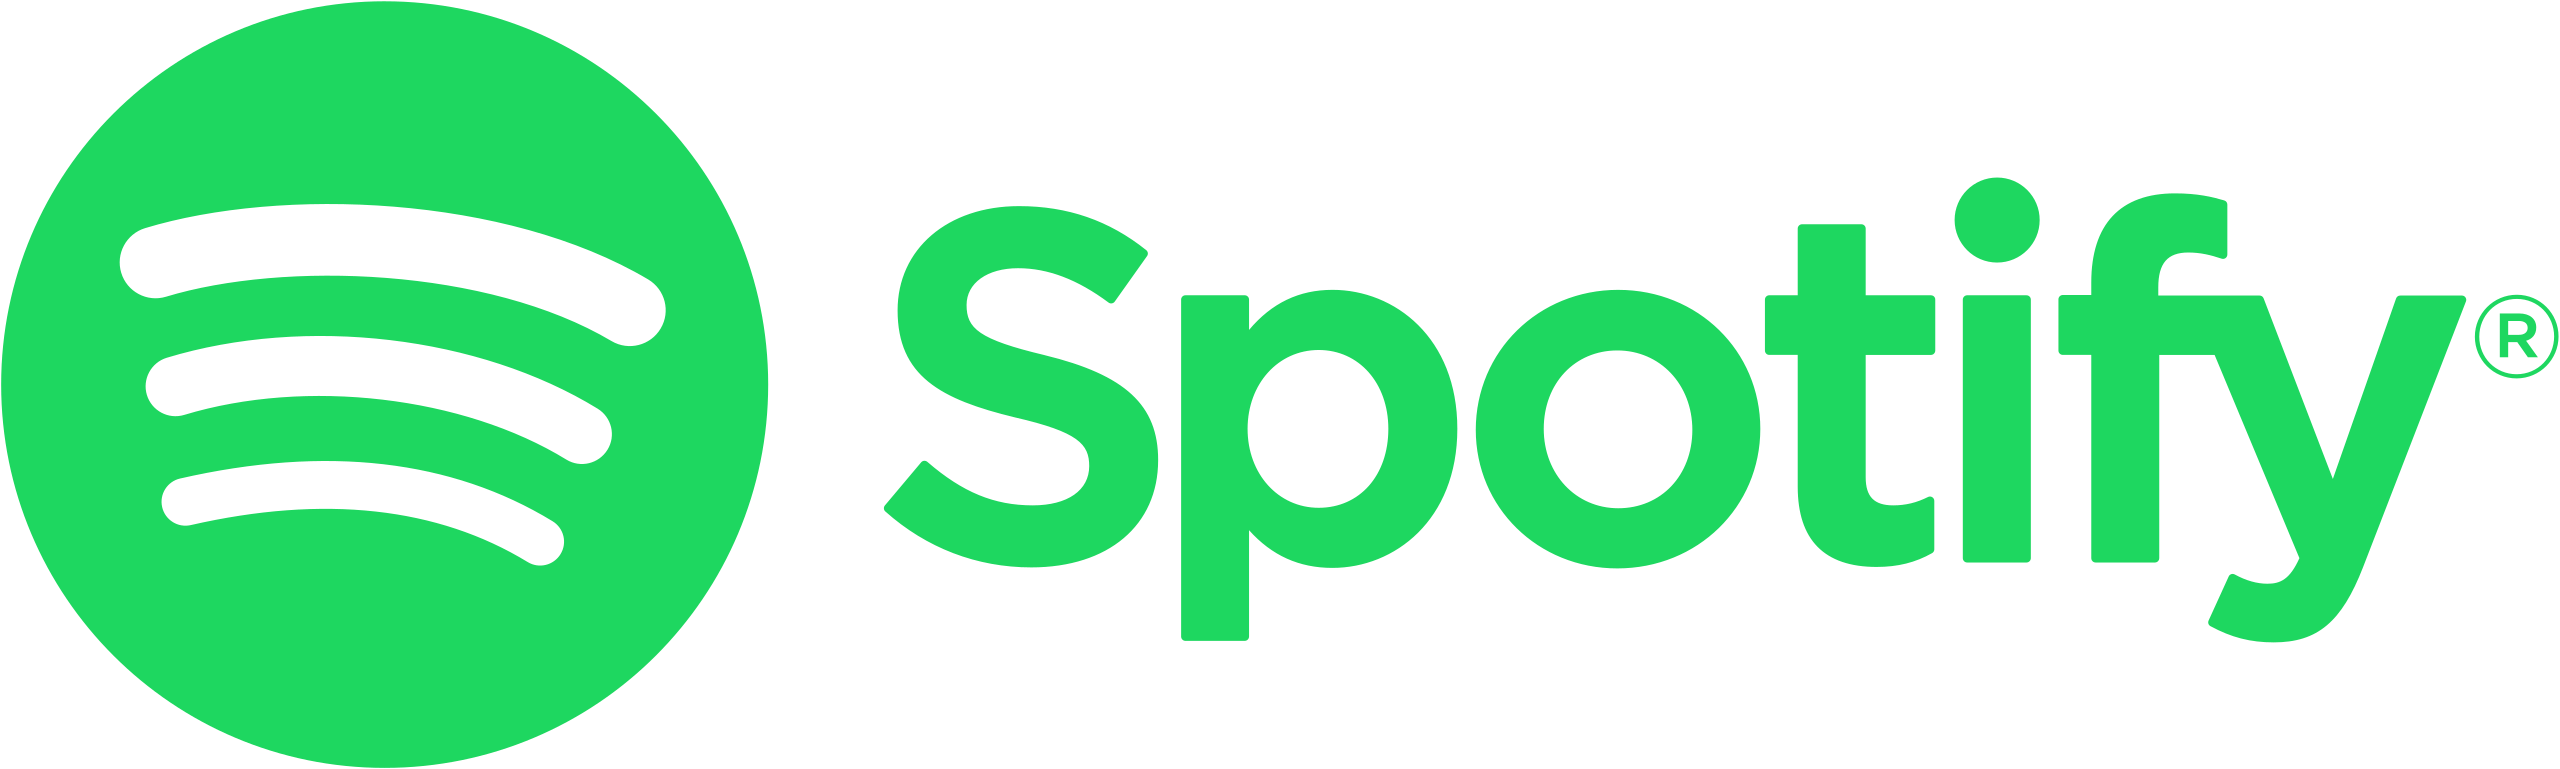

## **Spotify Top 50 Tracks Analysis**

### **Context**
Imagine you're a data analyst working for Spotify. Your team is responsible for content analysis and in this quarter you've decided to analyze Spotify's top hits to quantify what makes a hit song. Your team's product manager has many ideas and has prepared a list of questions (requirements) that she wants you to answer. After reviewing the list of over 20 questions, you are not in a good mood - it will take a couple of days to get all the answers.

Luckily, a few days ago, an experienced data scientist working in your team queried the top 50 tracks for her machine learning project and agreed to share the data with you. This is a great help - your SQL skills are not too sharp yet, and you don't yet know where to find all the relevant tables in your data warehouse. With this dataset, you are confident that you'll be able to answer all of your PM's questions, plus maybe even look into some additional points of interest.

## **Project Objectives**
### The main goals of this project are to:

- Analyze and clean the Spotify Top 50 Tracks dataset.
- Perform exploratory data analysis (EDA) to answer specific questions.
- Identify correlations and key characteristics of popular music.
- Provide visualizations to highlight findings in an easily understandable format.

## Step 1: Load the Data
First, we'll import numpy and pandas libraries for our analysis. Then load the dataset using Pandas and checking the first few rows to understand the data structure.

In [422]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\sylvia.gitau\Downloads\spotifytoptracks.csv")
data.head()

,Count,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Step 2: Data Cleaning
We will handle missing values, remove duplicate samples, and identify outliers. This ensures the dataset is clean and reliable for analysis.

#### 2.1 Handling Missing Values: We'll check for missing values using the combination of isna() and sum() methods. If it returns zero, we have no missing values to deal with.

In [423]:
# Check for missing values
data.isna().sum()

Count               0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

#### 2.2 Removing Duplicates: Using the duplicated() method, we check if there are repetitive entries in the dataset.

In [424]:
data.duplicated().sum()

0

#### 2.3 Outlier Treatment
So far, we have no duplicate rows and no missing values. However, we still need to find out, if we have any outliers in different columns. I've used a boxplot to identify outliers.

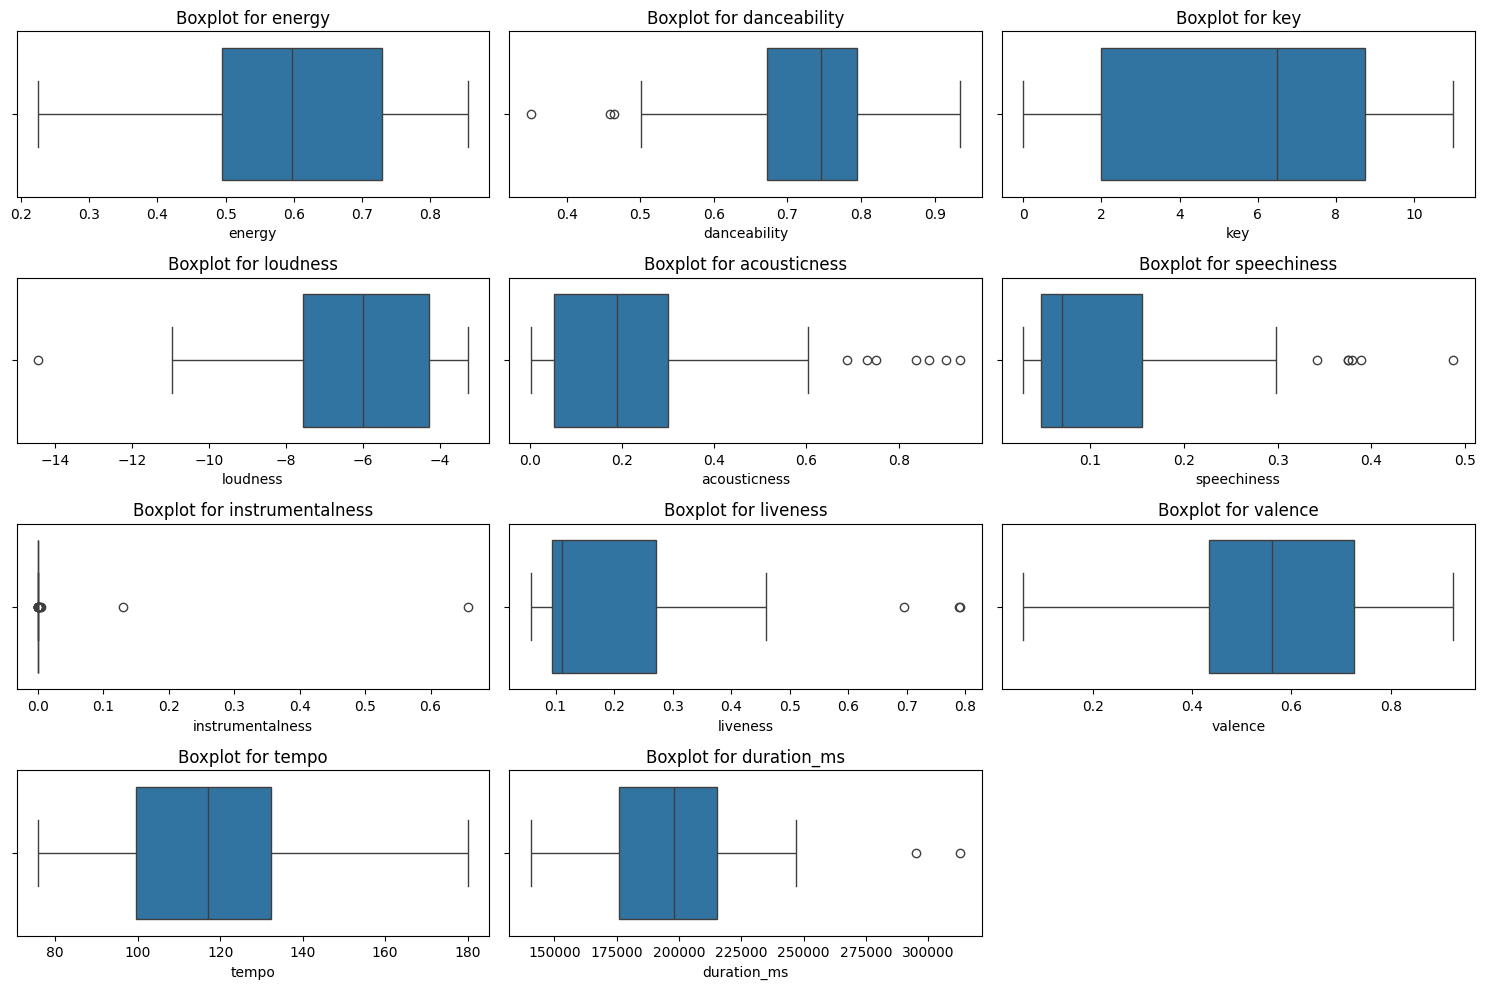

In [425]:
columns_to_check = ['energy', 'danceability', 'key', 'loudness', 'acousticness', 
                    'speechiness', 'instrumentalness', 'liveness', 'valence', 
                    'tempo', 'duration_ms']


plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)  # Arrange plots in a 4x3 grid (adjust as needed)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()  
plt.show()


About half the features have outliers in at least one dimension, so I’ve opted not to adjust for these outliers now and will move forward with the product manager's questions.
##### Comment: I've decided not to treat the outliers as they are essential to the data and removing them may lead to loss of valuable information or distortion of the analysis

## Step 3: Exploratory Data Analysis (EDA)
EDA helps us understand the underlying patterns and relationships in the data. We will answer some key questions about the tracks and artists.

#### 3.1 How many observations are there in this dataset?

In [426]:
sample = len(data.index)
features = len(data.columns)
observations = sample * features
print(f"There are {sample} samples over {features} features, resulting in {observations} observations")

There are 50 samples over 17 features, resulting in 850 observations


#### 3.2 How many features this dataset has?

In [427]:
print(f"There are {features} features in the dataset")

There are 17 features in the dataset


#### 3.3 Which of the features are categorical?

In [428]:
categorical_features = pd.Series(data.select_dtypes(include='object').columns)

print("The following features are categorical: ")
categorical_features

The following features are categorical: 


0        artist
1         album
2    track_name
3      track_id
4         genre
dtype: object

#### 3.4 Which of the features are numeric?
We'll select columns with data types int64 and float64

In [429]:
numeric_features = pd.Series(data.select_dtypes(include=['int64', 'float64']).columns)

print("The following features are numerical: ")
numeric_features

The following features are numerical: 


0                Count
1               energy
2         danceability
3                  key
4             loudness
5         acousticness
6          speechiness
7     instrumentalness
8             liveness
9              valence
10               tempo
11         duration_ms
dtype: object

#### 3.5 Are there any artists that have more than 1 popular track? If yes, which and how many?
We'll look for repetitions of artist name in the artist column, and return only those values the count of which is more than 1.

In [430]:
artist_counts = data['artist'].value_counts()
artist_counts[artist_counts > 1]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

#### 3.6 Who was the most popular artist?
There are two ways to answer this question:
- By top hit count, we already saw that Billie Eilish, Dua Lipa and Travis Scott has the most tracks in the list;
- Another way is to take the top row of the list.
As there is no *no_of_plays* feature, which would indicate how popular the track was, we assume that ordering by index represents the popularity.

In [431]:
print("The following is the most popular artist with the first position in chart: ")

data['artist'].head(1)

The following is the most popular artist with the first position in chart: 


0    The Weeknd
Name: artist, dtype: object

#### 3.7 How many artists in total have their songs in the top 50?
We'll look for unique entries in the artist column.

In [432]:
artist_count = len(data['artist'].unique())
print(f"{artist_count} artists have their songs in the top 50")

40 artists have their songs in the top 50


#### 3.8 Are there any albums that have more than 1 popular track? If yes, which and how many?

In [433]:
# Group by the 'album' column and count the number of tracks for each album
album_track_counts = data.groupby('album')['track_name'].count()

# Filter to find albums with more than one popular track
popular_albums = album_track_counts[album_track_counts > 1]

# Print the results
print("Albums with more than one popular track and their counts:\n", popular_albums)

Albums with more than one popular track and their counts:
 album
Changes                 2
Fine Line               2
Future Nostalgia        3
Hollywood's Bleeding    2
Name: track_name, dtype: int64


#### 3.9 How many albums in total have their songs in the top 50?

In [434]:
# Find the number of unique albums
unique_albums_count = data['album'].nunique()

print("Total number of unique albums with songs in the top 50 is", unique_albums_count)

Total number of unique albums with songs in the top 50 is 45


#### 4.0 Which tracks have a danceability score above 0.7?
We'll select the dataframe with artist, track_name and danceability columns. We then apply the condition, based on the danceability values, and sort the resulting dataframe by them in descending order.

In [435]:
danceability_score = data[['artist', 'track_name', 'danceability']]
high_danceability = danceability_score[danceability_score['danceability'] > 0.7].sort_values(by='danceability', ascending=False)

print("Tracks with a danceability score above 0.7: ")
high_danceability.head(5)

Tracks with a danceability score above 0.7: 


,artist,track_name,danceability
27,Cardi B,WAP (feat. Megan Thee Stallion),0.935
2,Roddy Ricch,The Box,0.896
39,Regard,Ride It,0.880
28,Surfaces,Sunday Best,0.878
33,BENEE,Supalonely (feat. Gus Dapperton),0.862


#### 4.1 Which tracks have a danceability score below 0.4?

In [436]:
low_danceability = danceability_score[danceability_score['danceability'] < 0.4].sort_values(by='danceability', ascending=True)

print("Tracks with danceability score below 0.4: ")
low_danceability

Tracks with danceability score below 0.4: 


,artist,track_name,danceability
44,Billie Eilish,lovely (with Khalid),0.351


#### 4.2 Which tracks have their loudness above -5?

In [437]:
loudness_score = data[['artist', 'track_name', 'loudness']]
loud_tracks = loudness_score[loudness_score['loudness'] > -5].sort_values(by='loudness', ascending=False)

print("Tracks having loudness above -5: ")
loud_tracks.head(5)

Tracks having loudness above -5: 


,artist,track_name,loudness
10,KAROL G,Tusa,-3.280
40,Travis Scott,goosebumps,-3.370
31,Dua Lipa,Break My Heart,-3.434
38,Maluma,Hawái,-3.454
12,Post Malone,Circles,-3.497


#### 4.3 Which tracks have their loudness below -8?

In [438]:
quiet_tracks = loudness_score[loudness_score['loudness'] < -8].sort_values(by='loudness', ascending=False)

print("Tracks having loudness below -8: ")
quiet_tracks.head(5)

Tracks having loudness below -8: 


,artist,track_name,loudness
20,Jawsh 685,Savage Love (Laxed - Siren Beat),-8.520
8,Trevor Daniel,Falling,-8.756
36,Travis Scott,HIGHEST IN THE ROOM,-8.764
7,Powfu,death bed (coffee for your head),-8.765
15,Drake,Toosie Slide,-8.820


#### 4.4 Which track is the longest?
For this, we select a subset of the original data frame, and indicate the maximum value in the **duration_ms** column, by using idxmax() feature.

In [439]:
# Select relevant columns for track duration
track_duration = data[['artist', 'track_name', 'duration_ms']]

# Find the index of the longest track (minimum duration)
longest_track = track_duration['duration_ms'].idxmax()

# Retrieve the details of the longest track
track_details = track_duration.loc[longest_track]

print("The longest track is:")
print(track_details)

The longest track is:
artist         Travis Scott
track_name       SICKO MODE
duration_ms          312820
Name: 49, dtype: object


#### 4.5 Which track is the shortest?

In [440]:
# Select relevant columns for track duration
track_duration = data[['artist', 'track_name', 'duration_ms']]

# Find the index of the shortest track (minimum duration)
shortest_track = track_duration['duration_ms'].idxmin()

# Retrieve the details of the shortest track
track_details = track_duration.loc[shortest_track]

print("The shortest track is:")
print(track_details)

The shortest track is:
artist                       24kGoldn
track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object


#### 4.6 Which genre is the most popular?

In [441]:
most_popular_genre = data['genre'].value_counts().idxmax()

print("Most popular genre:", most_popular_genre)

Most popular genre: Pop


#### 4.7 Which genres have just one song on the top 50?
For this, let's use the condition, transforming genres into indices, and resulting counts as values.

In [442]:
song_genre = data[['artist', 'track_name', 'genre']]
genre_list = data['genre'].value_counts()
single_track_per_genre = genre_list[genre_list < 2].index

unique_genre_tracks = song_genre[song_genre['genre'].isin(single_track_per_genre)]

print("The following genres only appear once in the dataset: ")
unique_genre_tracks.head(5)

The following genres only appear once in the dataset: 


,artist,track_name,genre
4,Dua Lipa,Don't Start Now,Nu-disco
8,Trevor Daniel,Falling,R&B/Hip-Hop alternative
12,Post Malone,Circles,Pop/Soft Rock
23,24kGoldn,Mood (feat. iann dior),Pop rap
27,Cardi B,WAP (feat. Megan Thee Stallion),Hip-Hop/Trap


#### 4.8 How many genres in total are represented in the top 50?

In [443]:
print(f"There are {len(data['genre'].unique())} genres in the top 50")

There are 16 genres in the top 50


#### 4.9 Which features are strongly positively correlated?

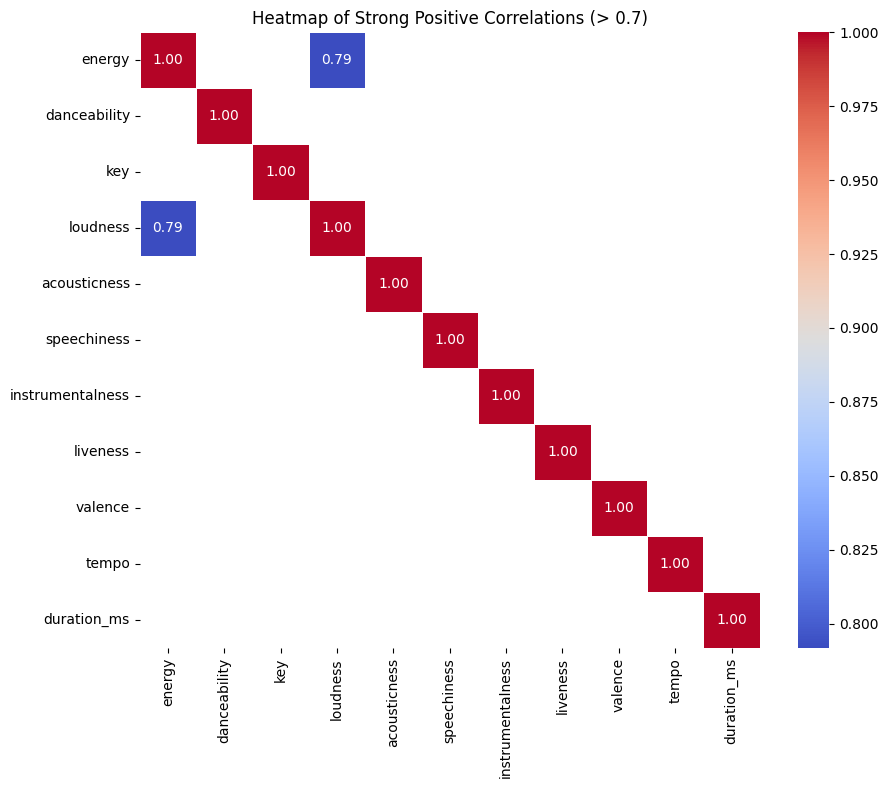

In [444]:
features = data.iloc[:, 5:16]

corr_matrix = features.corr()

strong_corr = corr_matrix[corr_matrix > 0.7]

plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heatmap of Strong Positive Correlations (> 0.7)')
plt.show()

We see that there are the following correlations:
- Energy – Loudness

This shows that the louder the music, the more energetic it feels 

#### 5.0 Which features are strongly negatively correlated?

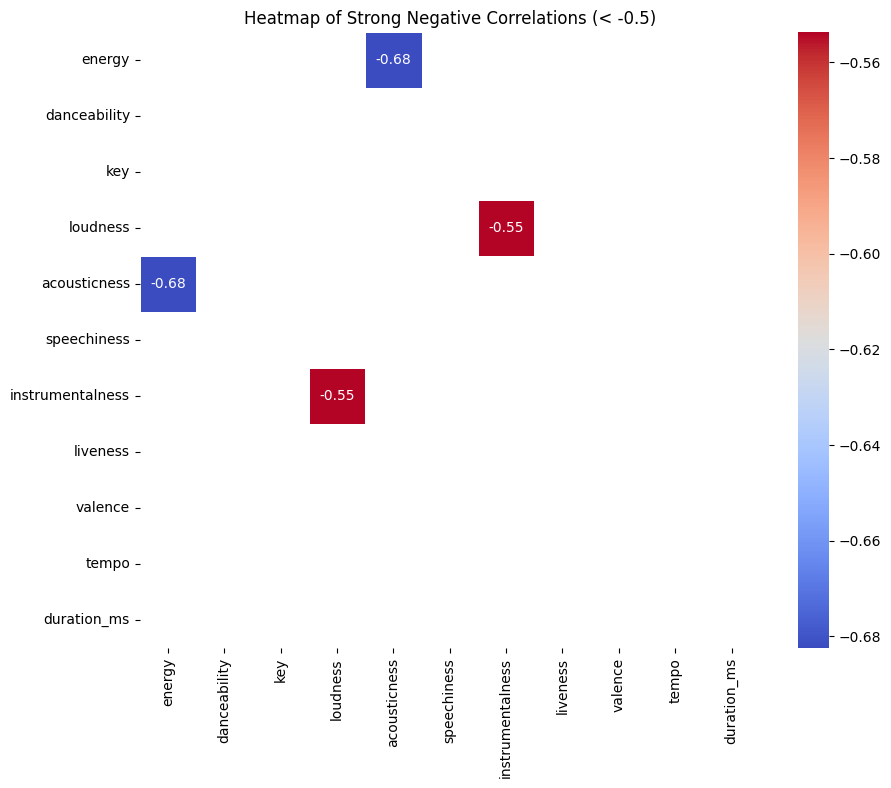

In [445]:
features = data.iloc[:, 5:16]

corr_matrix = features.corr()

strong_neg_corr = corr_matrix[corr_matrix < -0.5]

plt.figure(figsize=(10, 8))
sns.heatmap(strong_neg_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heatmap of Strong Negative Correlations (< -0.5)')
plt.show()

We see that there are the following correlations:

- **Energy – Acousticness**
- **Instrumentalness – Loudness**

From these observations, we can infer that the energy of a track is strongly positively related to its loudness, while it negatively correlates with acousticness—indicating that more energetic tracks tend to be less acoustic and calmer. Additionally, instrumental tracks appear to be quieter compared to others.

#### 5.1 Which features are not correlated?
We use the same conditional approach here, setting the range of low correlation to (-0.25, 0.25).

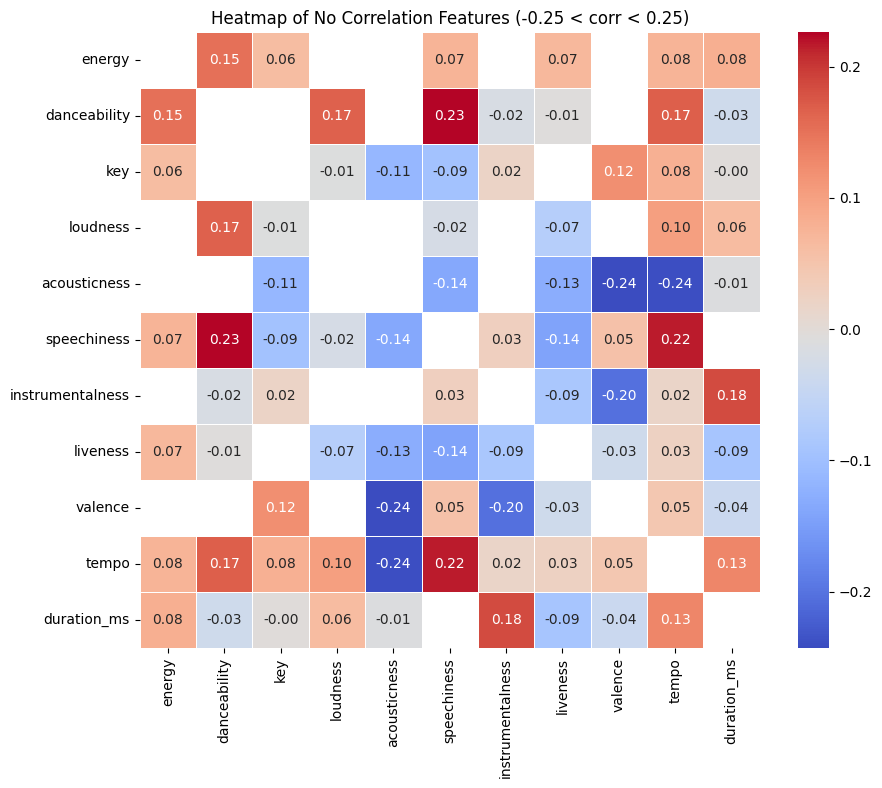

In [446]:
no_corr_matrix = correlation_matrix[(correlation_matrix > -0.25) & (correlation_matrix < 0.25)]

# Plot the heatmap of no correlations
plt.figure(figsize=(10, 8))
sns.heatmap(no_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heatmap of No Correlation Features (-0.25 < corr < 0.25)')
plt.show()

## Step 4: How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
For this, we'll print summaries of descriptive statistics, using the describe method. We also indicate key genres in a separate list for the easier usability further on. For more informative appraoch, we'll also add median manually.

In [452]:
key_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

In [453]:
danceability_by_key_genre = data[['danceability', 'genre']].set_index('genre').loc[key_genres]
for genre in key_genres:
    print(genre, '\n', danceability_by_key_genre.loc[genre].describe(), '\n', "median: ", danceability_by_key_genre.loc[genre].median(), '\n')

Pop 
        danceability
count     14.000000
mean       0.677571
std        0.109853
min        0.464000
25%        0.615750
50%        0.690000
75%        0.762750
max        0.806000 
 median:  danceability    0.69
dtype: float64 

Hip-Hop/Rap 
        danceability
count     13.000000
mean       0.765538
std        0.085470
min        0.598000
25%        0.726000
50%        0.774000
75%        0.830000
max        0.896000 
 median:  danceability    0.774
dtype: float64 

Dance/Electronic 
        danceability
count      5.000000
mean       0.755000
std        0.094744
min        0.647000
25%        0.674000
50%        0.785000
75%        0.789000
max        0.880000 
 median:  danceability    0.785
dtype: float64 

Alternative/Indie 
        danceability
count      4.000000
mean       0.661750
std        0.211107
min        0.459000
25%        0.490500
50%        0.663000
75%        0.834250
max        0.862000 
 median:  danceability    0.663
dtype: float64 



On average, we see that Hip-Hop/Rap and Dance/Electronic tracks have a higher danceability score. Hip-Hop/Rap also has the most danceable track (0.896) of all genres. The least danceable genre is Alternative/Indie, which also has the least danceable track (0.459)

## Step 5: How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [454]:
loudness_by_key_genre = data[['loudness', 'genre']].set_index('genre').loc[key_genres]
for genre in key_genres:
    print(genre, '\n', loudness_by_key_genre.loc[genre].describe(), '\n', "median: ", loudness_by_key_genre.loc[genre].median(), '\n')

Pop 
         loudness
count  14.000000
mean   -6.460357
std     3.014281
min   -14.454000
25%    -7.178750
50%    -6.644500
75%    -3.875250
max    -3.280000 
 median:  loudness   -6.6445
dtype: float64 

Hip-Hop/Rap 
         loudness
count  13.000000
mean   -6.917846
std     1.891808
min    -8.820000
25%    -8.520000
50%    -7.648000
75%    -5.616000
max    -3.370000 
 median:  loudness   -7.648
dtype: float64 

Dance/Electronic 
        loudness
count  5.000000
mean  -5.338000
std    1.479047
min   -7.567000
25%   -5.652000
50%   -5.457000
75%   -4.258000
max   -3.756000 
 median:  loudness   -5.457
dtype: float64 

Alternative/Indie 
        loudness
count  4.000000
mean  -5.421000
std    0.774502
min   -6.401000
25%   -5.859500
50%   -5.268500
75%   -4.830000
max   -4.746000 
 median:  loudness   -5.2685
dtype: float64 



As expected, the Dance/Electronic music is the loudest, while Hip-Hop/Rap has the quietest songs. However, if we compare the median values, Alternative/Indie has the higher middle value, meaning that there are really loud songs among Dance/Electronic, which skew the data, or the majority of Alternative/Indie songs tend to be louder.

## Step 6: How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [455]:
acousticness_by_key_genre = data[['acousticness', 'genre']].set_index('genre').loc[key_genres]
for genre in key_genres:
    print(genre, '\n', acousticness_by_key_genre.loc[genre].describe(), '\n', "median: ", acousticness_by_key_genre.loc[genre].median(), '\n')

Pop 
        acousticness
count     14.000000
mean       0.323843
std        0.318142
min        0.021000
25%        0.059900
50%        0.259000
75%        0.348000
max        0.902000 
 median:  acousticness    0.259
dtype: float64 

Hip-Hop/Rap 
        acousticness
count     13.000000
mean       0.188741
std        0.186396
min        0.005130
25%        0.067000
50%        0.145000
75%        0.234000
max        0.731000 
 median:  acousticness    0.145
dtype: float64 

Dance/Electronic 
        acousticness
count      5.000000
mean       0.099440
std        0.095828
min        0.013700
25%        0.014900
50%        0.068600
75%        0.177000
max        0.223000 
 median:  acousticness    0.0686
dtype: float64 

Alternative/Indie 
        acousticness
count      4.000000
mean       0.583500
std        0.204086
min        0.291000
25%        0.525750
50%        0.646000
75%        0.703750
max        0.751000 
 median:  acousticness    0.646
dtype: float64 



The most acoustic genre is Alternative/Indie, having both the highest mean and median values, the latter also surpassing the former – meaning that the values are in general on the higher side. Dance/Electronic tracks are the least acoustic.

## **Key Insights and Considerations**
- **Top Artists:** Billie Eilish, Travis Scott, and Dua Lipa each have 3 songs in the top 50, collectively making up nearly 20% of the chart, highlighting a concentration of hits among a few artists.

- **Song Outliers:** Billie Eilish's "everything i wanted" is an outlier across 3 dimensions. Additionally, 25 songs are outliers in at least one dimension.

- **Genre Distribution:** Four main genres account for 80% of the tracks. Many lesser-represented genres are combinations of primary ones, which may require further analysis. R&B/Soul, despite having the most popular track, has only 2 songs, indicating its decline.

- **Feature Correlations:** Energy and loudness are strongly correlated. There is a negative correlation between energy and acousticness, as well as between instrumentalness and loudness. Tempo and track duration have minimal impact on other features.

- **Genre-Specific Trends:**

  - Hip-Hop/Rap and Dance/Electronic: Higher danceability scores, with Hip-Hop/Rap having the most danceable track (0.896).
  - Alternative/Indie: Least danceable genre, with the lowest danceability track (0.459).
  - Loudness: Dance/Electronic is the loudest, while Hip-Hop/Rap is the quietest. However, Alternative/Indie tracks tend to be louder in the median.
  - Acousticness: Alternative/Indie is the most acoustic, with higher mean and median values. Dance/Electronic is the least acoustic.

## **Opportunities for Improvement and Further Analysis**
- **Listener/Play Count:** The dataset lacks listener or play count data, so we relied on indexing as a proxy for popularity. It would be valuable to explore the relationship between play count and other features numerically to gain deeper insights into track popularity.

- **Genre Refinement:** The genre categorization could be enhanced by creating broader categories (e.g., combining nu-pop and disco-pop under a "Pop" label). We could use regex and mapping techniques to add multiple genre columns for more detailed analysis.

- **Tonality and Key Features:** The relationship between key features, such as valence and energy, could be further explored, especially by considering tonalities (major vs. minor). While no initial correlation was found, analyzing this aspect may reveal how tonalities influence the characteristics of popular music.